In [1]:
! pip install yellowbrick

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.svm import LinearSVC
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from sklearn.svm import SVC
from yellowbrick.contrib.classifier import DecisionViz

In [3]:
# 데이터 불러오기 및 요약
data_loc = 'https://github.com/dknife/ML/raw/main/data/'
life = pd.read_csv(data_loc + 'life_expectancy.csv', error_bad_lines=False)
life.head()

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
# 데이터중 필요한 열만 인덱싱
life = life[['Life expectancy', 'Alcohol', 'Percentage expenditure', 'Polio', 'BMI', 'GDP', 'Thinness 1-19 years']]

# na결측값 바로 제거
life.dropna(inplace = True)

# 입력값과 출력값 구분
X = life[['Alcohol', 'Percentage expenditure', 'Polio', 'BMI', 'GDP', 'Thinness 1-19 years']]
y = life['Life expectancy']

In [5]:
# 3차 다항식으로 다항회귀 모델 선언
poly_feature = PolynomialFeatures(degree = 3)

# 선언한 다항회귀 모델 변환
X = poly_feature.fit_transform(X)

Mean Squared Error: 25.456442760072267


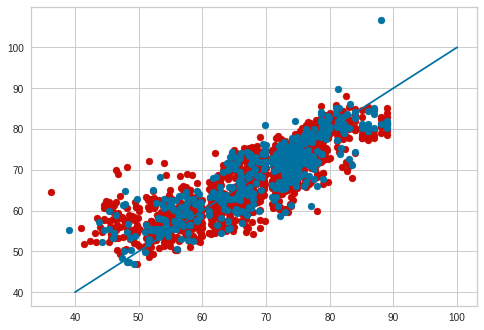

In [6]:
# 데이터들을 훈련데이터와 검증데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# 선형회귀 모델 선언
lin_model = LinearRegression()

# 훈련데이터로 모델 훈련
lin_model.fit(X_train, y_train)

# 훈련데이터의 예측값
y_hat_train = lin_model.predict(X_train)

# 검증 데이터의 예측값
y_hat_test = lin_model.predict(X_test)

# 두 예측값을 그래프로 표현, 이때 훈련데이터를 빨간색/검증데이터를 파란색으로 지정
plt.scatter(y_train, y_hat_train, color='r')
plt.scatter(y_test, y_hat_test, color='b')

# 데이터들의 기준이 되는 선 그리기
plt.plot([40,100], [40, 100])

# 훈련시킨 모델들의 MSE 출력
print("Mean Squared Error:", mean_squared_error(y_test,y_hat_test))

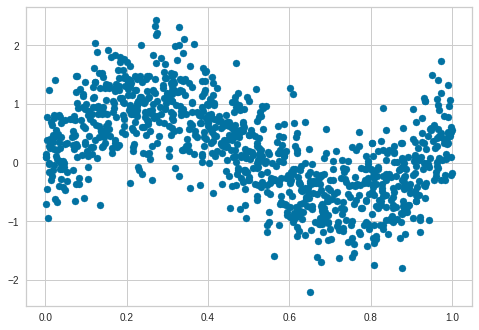

In [7]:
# LAB 6-1 다항 회귀의 회귀 함수를 그려 보자
# 학습에 필요한 데이터 불러오기
data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc + 'nonlinear.csv', error_bad_lines=False)

# 데이터 분포 표현
plt.scatter(df['x'], df['y'])

In [8]:
# 3차 다항 회귀를 위해 데이터 변환
# x와y값을 넘파이 배열로 변경
X = df['x'].to_numpy()
y = df['y'].to_numpy()

# 입력값을 2차원 벡터로 변환
X = X.reshape(-1,1)
# 3차 다항회귀를 할 수 있게 데이터 변환
feature_cubic = PolynomialFeatures(degree = 3)
X_3 = feature_cubic.fit_transform(X)

In [9]:
# 선형회귀 모델 선언
lin_model = LinearRegression()
# 0부터 1까지 100개의 데이터로 2차원 배열 생성
domain = np.linspace(0, 1, 100).reshape(-1,1)

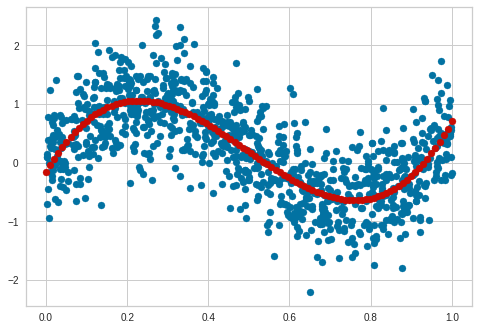

In [10]:
# 모델 학습
lin_model.fit(X_3, y)
# 다항회귀를 할수 있도록 입력용 데이터 형식 변환
domain_3 = feature_cubic.fit_transform(domain)
# domain _3에대한 예측
predictions = lin_model.predict(domain_3)
# 학습용 데이터 분포 그리기
plt.scatter(df['x'], df['y'])
# 학습한 모델 표현
plt.scatter(domain, predictions, color='r')

In [11]:
# iris 데이터 불러오기
iris = load_iris()
X, y = iris.data, iris.target

# 결정 트리 선언
dec_tree = DecisionTreeClassifier(max_depth=3)
# 결정 트리 훈련
dec_tree.fit(X,y)

DecisionTreeClassifier(max_depth=3)

In [12]:
export_graphviz(
    dec_tree,
    out_file = ("./dec_tree_for_iris.dot"),
    feature_names = iris.feature_names,
)

In [13]:
!dot -Tjpg dec_tree_for_iris.dot -o dec_tree_for_iris.jpg

dec_tree_img = plt.imread('./dec_tree_for_iris.jpg')
plt.figure(num=None, figsize=(12, 8), dpi=80,
          facecolor='w', edgecolor='k')
plt.imshow(dec_tree_img)

/bin/bash: dot: command not found


FileNotFoundError: [Errno 2] No such file or directory: './dec_tree_for_iris.jpg'

In [14]:
iris = load_iris()
X, y = iris.data, iris.target
dec_tree = DecisionTreeClassifier(max_depth=3, criterion = 'entropy')
dec_tree.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [15]:
export_graphviz(
    dec_tree,
    out_file=("./dec_tree_for_iris.dot"),
    feature_names=iris.feature_names,
)

In [16]:
!dot -Tjpg dec_tree_for_iris.dot -o dec_tree_for_iris.jpg

dec_tree_img = plt.imread('./dec_tree_for_iris.jpg')
plt.figure(num=None, figsize=(12, 8), dpi=80,
          facecolor='w', edgecolor='k')
plt.imshow(dec_tree_img)

/bin/bash: dot: command not found


FileNotFoundError: [Errno 2] No such file or directory: './dec_tree_for_iris.jpg'

In [17]:
data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc+'two_classes.csv', error_bad_lines=False)
df.tail(5)

,x1,x2,y
995,2.664896,-1.955326,0
996,-2.019928,0.334542,1
997,-4.634470,0.300158,1
998,1.426275,-2.765590,0
999,1.988053,1.466494,0


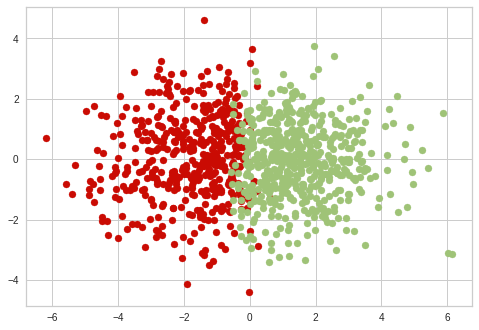

In [18]:
# y가 1인 데이터만 추출
df_positive = df[df['y']>0]
# y가 0인 데이터만 추출
df_negative = df[df['y']==0]

plt.scatter(df_positive['x1'], df_positive['x2'], color='r')
plt.scatter(df_negative['x1'], df_negative['x2'], color='g')

In [19]:
# x1, x2를 입력 벡터로 한다
X = df[['x1', 'x2']].to_numpy()
# y열의 값이 레이블
y = df['y']
# SVM클래스 생성
svm_simple = LinearSVC(C=1, loss = 'hinge')
# 입력과 레이블로 SVM 학습 실시
svm_simple.fit(X,y)

LinearSVC(C=1, loss='hinge')

In [20]:
svm_simple.predict([[0.12, 0.56], [-4,40], [0,40], [5, 20]])

array([0, 1, 1, 0])

/opt/conda/lib/python3.8/site-packages/yellowbrick/contrib/classifier/boundaries.py:435: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  self.ax.pcolormesh(


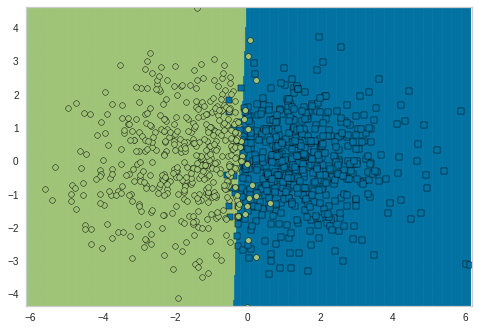

In [21]:
viz = DecisionViz(svm_simple, title="linear SVM")
viz.fit(X, y)
viz.draw(X, y)

In [22]:
# 해보기 5 - 얼굴 찾기: SVM으로 분류하기

In [23]:
url = "https://github.com/dknife/ML/raw/main/data/Proj2/faces/"

face_images = []

for i in range(15):
    # 이미지 파일 이름을 만든다
    file = url + 'img{0:02d}.jpg'.format(i+1)
    # 이미지를 읽는다
    img = imread(file)
    # 이미지의 크기를 변경한다
    img = resize(img, (64,64))
    # face_images에 담는다
    face_images.append(img)

In [24]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/faces/'

face_images = []

for i in range(15):
    # 이미지 파일 이름을 만든다
    file = url + 'img{0:02d}.jpg'.format(i+1)
    # 이미지를 읽는다
    img = imread(file)
    # 이미지의 크기를 변경한다
    img = resize(img, (64,64))
    face_images.append(img)

In [49]:
face_hogs = []
face_features = []

# hog()함수를 수행하고 디스크립터와 가시화 이미지를 차례로 배열에 담았다.
for i in range(15):
    hog_desc, hog_image = hog(face_images[i], orientations=8,
                             pixels_per_cell=(16,16), cells_per_block=(1,1),
                              visualize=True, multichannel=True)
    face_hogs.append(hog_image)
    face_features.append(hog_desc)
    
# 계속 plot_images가 정의되어 있지 않다하고 따로 구글링하여도 찾지 못하여 주석처리 하였습니다.
#plot_images(3, 5, face_hogs)

NameError: name 'plot_images' is not defined

In [30]:
# 한 블록당 8개 방향의 정보가 담겨있어 16*8 개의 숫자로 이루어진 (128,) 크기의 배열이 된다.
print(face_features[0].shape)

(128,)


<Figure size 576x396 with 0 Axes>

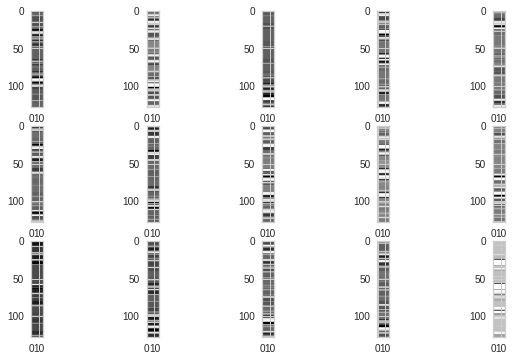

In [32]:
fig = plt.figure()
fig, ax = plt.subplots(3,5, figsize = (10,6))
for i in range(3):
    for j in range(5):
        ax[i, j].imshow( resize(face_features[i*5+j], (128,16)))

<Figure size 576x396 with 0 Axes>

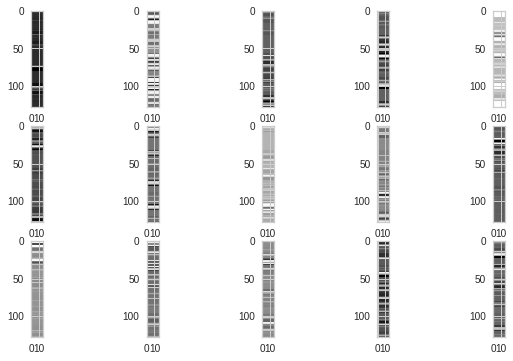

In [51]:
# 사람 얼굴을 준비하는 것처럼 동물 이미지를 준비한다.
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/animals/'
animal_images=[]

for i in range(15):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64,64))
    animal_images.append(img)

#plot_images(3, 5, animal_images)
    
animal_hogs = []
animal_features = []

for i in range(15):
    hog_desc, hog_image = hog(animal_images[i], orientations=8,
                             pixels_per_cell=(16,16), cells_per_block=(1,1),
                             visualize=True, multichannel=True)
    animal_hogs.append(hog_image)
    animal_features.append(hog_desc)

# plot_images(3, 5, animal_hogs)    

fig = plt.figure()
fig, ax = plt.subplots(3,5, figsize = (10,6))
for i in range(3):
    for j in range(5):
        ax[i, j].imshow(resize(animal_features[i*5+j], (128,16)))

In [36]:
X, y = [], []

for feature in face_features:
    X.append(feature)
    y.append(1)
for feature in animal_features:
    X.append(feature)
    y.append(0)
print(y)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [42]:
polynomial_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(C=1, kernel = 'poly', degree=5, coef0=10.0))
])
polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=1, coef0=10.0, degree=5, kernel='poly'))])

In [43]:
yhat = polynomial_svm_clf.predict(X)
print(yhat)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [45]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/test_data/'

test_images = []

for i in range(10):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64,64))
    test_images.append(img)
    
#plot_images(2, 5, test_images)

In [47]:
test_features = []
for i in range(10):
    hog_desc, hog_image = hog(test_images[i], orientations=8,
                             pixels_per_cell=(16, 16), cells_per_block=(1,1),
                             visualize=True, multichannel=True)
    test_features.append(hog_desc)

test_result = polynomial_svm_clf.predict(test_features)
print(test_result)

[1 0 1 0 0 0 0 0 1 0]


<Figure size 576x396 with 0 Axes>

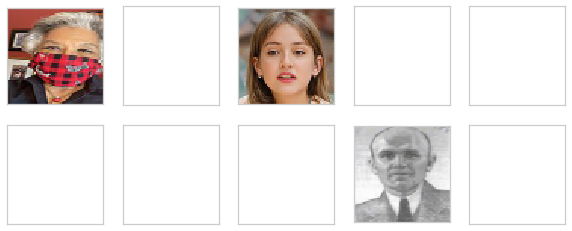

In [48]:
fig = plt.figure()
fig, ax = plt.subplots(2,5, figsize = (10,4))
for i in range(2):
    for j in range(5):
        ax[i,j].get_xaxis().set_visible(False)
        ax[i, j].get_yaxis().set_visible(False)
        if test_result[i*5+j] == 1:
            ax[i, j].imshow(test_images[i*5+j],interpolation='nearest')